# MSc in AI - CE6002 & CS5062


# E-tivity 3: Basic Techniques for Learning
# Task 4 - Linear Regression

## Student Name: Mark Murnane
## Student ID: 18195326

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

### Data Load & Visualisation

The data for this Task is located in Task4.csv.  It needs to be read in, and visualised.

In [2]:
df = pd.read_csv('Task4.csv', header=0)
print(f"Shape of the source data is {df.shape[0]} rows, each with {df.shape[1]} columns\n")
df.describe()

Shape of the source data is 100 rows, each with 2 columns



,X,y
count,100.000000,100.000000
mean,0.499995,0.786404
std,0.293037,0.396402
min,0.000000,-0.347000
25%,0.250250,0.639750
50%,0.500000,0.928000
75%,0.749750,1.075000
max,1.000000,1.270000


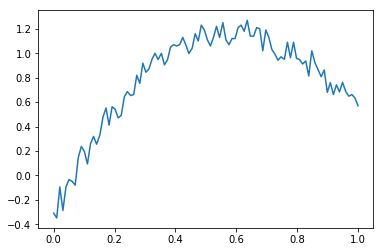

In [3]:
plt.plot(df.X.values, df.y.values)

### Linear Regression Code

The code below is copied from the code in *Etivity3_LinearClassification_18195326.ipnyb*.  This version includes both a `score()` method which performs the  calculation previously implemented in `predict()`.  In turn the `predict()` method classifies by using the _sign_ of the `score()` output.

In [4]:
class MyLinearRegressor(object):
    
    """Implementation of simple Linear Regression and Classification algorithms based on the algorithms outlined
       in Learning from Data, Chapter 3"""
    
    # Simple initialiser to make sure we have a instance variable for weights
    def __init__(self):
        self.weights_ = np.array([])

    # Fit function to determine the weights to be used by the classifer
    # This algorithm is based on Learning from Data, p.86 
    def fit(self, X_in, y_in):        
        # Add the bias coordinate to the input array
        X = np.hstack((np.ones((X_in.shape[0],1)), X_in))              
        
        # Pseudo-code
        #w = (((X^transpose@X)^-1)X^transpose)@y       

        # Shorthand Xd = np.linalg.pinv(X)
        # Do this the long way for understanding for now
        Xt = np.transpose(X)
        Xd = np.matmul(np.linalg.inv(np.matmul(Xt, X)), Xt)

        self.weights_ = np.matmul(Xd, y_in)

    def score(self, X_in):
        X = np.hstack((np.ones((X_in.shape[0],1)), X_in))
        y_hat = np.matmul(X, self.weights_)

        return y_hat

    # Predicts a set of output classes (y^) based in the input attributes and this model's weights
    def predict(self, X_in):    
        return np.sign(self.score(X_in))
    

In [5]:
# Borrowed/modified from Etivity 1 code
def point_on_boundary(bias, weight_1, weight_2, x):
    # Return the y-position on the boundary based on given x-position
    return -(bias+weight_1*x)/weight_2

def decision_boundary(bias, weight_1, weight_2, x_min, x_max):
    # Return two points on the decision boundary
    return [point_on_boundary(bias, weight_1, weight_2, x_min), point_on_boundary(bias, weight_1, weight_2, x_max)]

In [6]:
# Error function
def calc_error(y_predict, y_actual):
    pass

### Initial Experiment

In the initial experiement we run a Linear Regression on the raw data set without using any new features.

-----

To avoid snooping, before we do anything we split the data set.

In [7]:
 # Get the input and target values
X = df.X.values
y = df.y.values

# Re-shape to ensure that there is a valid 2-d shape description
X = X.reshape(X.shape[0],1)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [8]:
# Perform the regression
mlr = MyLinearRegressor()
mlr.fit(X_train, y_train)

y_hat = mlr.score(X_train)

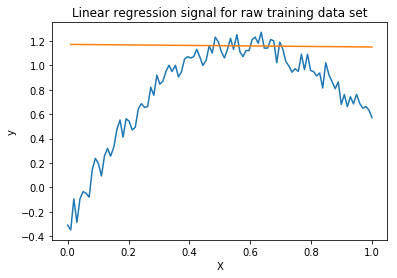

In [26]:
# These are 0 and 1, but just in case
x_min = X_train.min()
x_max = X_train.max()

# Plot the regression line
plt.plot(X, y)
plt.plot([x_min, x_max], [y_hat[0], y_hat[79]])
plt.title("Linear regression signal for raw training data set")
plt.xlabel("X")
plt.ylabel("y")
plt.show()



### New Features

Looking at the plot of the raw data and the Linear Regression signal, the result is clearly less than useful.  There is noise in the raw data, however the overall shape appears to be parabolic.  This suggests that using a 2nd order function might be useful.

From here we can create the new features and train on them.

In [20]:
# Generate new features, but exclude the bias as my Regressor Implmentation does this already
polygen = PolynomialFeatures(degree=2, include_bias = False)

poly_X_train = polygen.fit_transform(X_train)
poly_X_test = polygen.fit_transform(X_test)

For a single input, the only polynomial combinations are $x_n$ and $x_{n}^2$.

-----

Perform the regression on the modified data and score it.

In [21]:
poly_mlr = MyLinearRegressor()
poly_mlr.fit(poly_X_train, y_train)
y_hat = poly_mlr.score(poly_X_train)

Examine the weights to determine what the important parameters are.

In [38]:
print(poly_mlr.weights_)

[-0.28548779  4.89446178 -4.09325841]


From this we can see that both parameters are important.  This suggests are function is of the form:

$\tilde{g}(x) = x_{n}^2 + x_n$

This is the general form of a quadratic equation that describes a parabola.

-----

Plot the results.

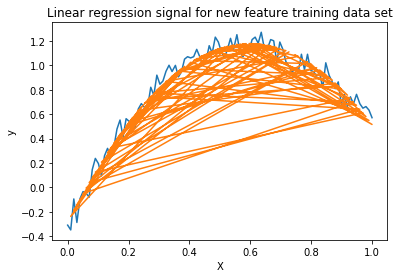

In [49]:
# Plot the regression 
plt.plot(X, y)



plt.plot(poly_X_train[:,0], y_hat)
plt.title("Linear regression signal for new feature training data set")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

While the graph is not quite correct, overall if shows the output of the algorithm is parabolic in nature and approximates to the original data.